In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [63]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
from numpy import mean

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii1.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
Base

sqlalchemy.ext.automap.Base

In [12]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent

('2017-08-23')

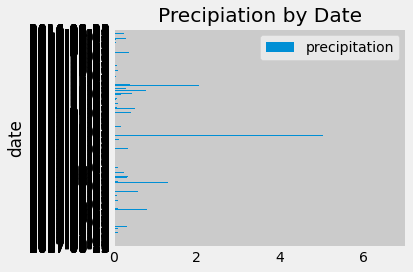

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
last12 = session.query(measurement.prcp, measurement.date).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
olddf = pd.DataFrame(last12[:], columns=['precipitation', 'date'])
olddf.set_index('date', inplace=True, )
newdf = olddf.dropna()








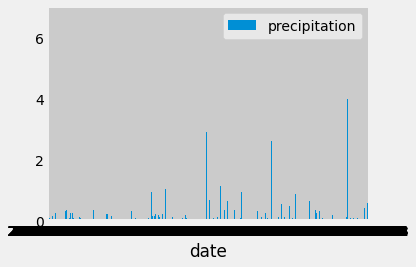

In [56]:
newdf.plot.bar(rot=0)
plt.tight_layout()
plt.show()

In [57]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = newdf.describe(include='all') 
summary

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number stations in the dataset
session_amount = session.query(measurement.station).count()
session_amount

19550

In [75]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

actives = session.query(measurement.station, measurement.tobs).order_by(measurement.tobs.desc()).all()
actives

[('USC00519397', 87.0),
 ('USC00519397', 87.0),
 ('USC00517948', 87.0),
 ('USC00511918', 87.0),
 ('USC00511918', 86.0),
 ('USC00511918', 86.0),
 ('USC00511918', 86.0),
 ('USC00511918', 86.0),
 ('USC00519397', 85.0),
 ('USC00519397', 85.0),
 ('USC00513117', 85.0),
 ('USC00513117', 85.0),
 ('USC00514830', 85.0),
 ('USC00519523', 85.0),
 ('USC00519281', 85.0),
 ('USC00511918', 85.0),
 ('USC00511918', 85.0),
 ('USC00511918', 85.0),
 ('USC00511918', 85.0),
 ('USC00519397', 84.0),
 ('USC00519397', 84.0),
 ('USC00519397', 84.0),
 ('USC00519397', 84.0),
 ('USC00519397', 84.0),
 ('USC00513117', 84.0),
 ('USC00513117', 84.0),
 ('USC00513117', 84.0),
 ('USC00513117', 84.0),
 ('USC00513117', 84.0),
 ('USC00514830', 84.0),
 ('USC00514830', 84.0),
 ('USC00517948', 84.0),
 ('USC00517948', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523', 84.0),
 ('USC00519523',

In [89]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
usc005 = session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == 'USC00519397').\
    order_by(measurement.tobs).all()
oldf = pd.DataFrame(usc005[:], columns=['station', 'tobs'])
oldf.set_index('station', inplace=True, )
newwdf = oldf.dropna()
mean = newwdf['tobs'].mean()
lowest = newwdf['tobs'].min()
highest = newwdf['tobs'].max()
print(mean, lowest, highest)

74.55323054331865 56.0 87.0


In [92]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mostrecent = session.query(measurement.date).\
    filter(measurement.station == 'USC00519397').\
    order_by(measurement.date.desc()).first()

last12s = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.station == 'USC00519397').all()
last12s


[('2016-08-23', 81.0),
 ('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-30', 80.0),
 ('2016-10-01', 80.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

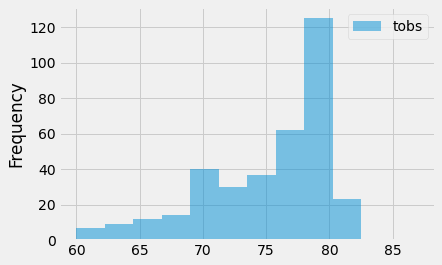

In [98]:
#histogram
oldf = pd.DataFrame(last12s[:], columns=['date', 'tobs'])
oldf.set_index('date', inplace=True, )
newwwdf = oldf.dropna()
hist = newwwdf.plot.hist(bins=12, alpha=0.5)
hist

# Close session

In [99]:
# Close Session
session.close()